<a href="https://colab.research.google.com/github/JabesNestor/proyecto/blob/main/proyecto_mosquitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos fueron extraido de:
https://news.seoul.go.kr/welfare/mosquito

#Importamos las paqueterias



In [ ]:
!pip install regressors
!pip install setuptools==58

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/mosquito_Indicator.csv')
df.head(3)

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6


In [ ]:
df.columns = ['date','mosquito_in','rain_mm','mean_t','min_t','max_t']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1342 non-null   object 
 1   mosquito_in  1342 non-null   float64
 2   rain_mm      1342 non-null   float64
 3   mean_t       1342 non-null   float64
 4   min_t        1342 non-null   float64
 5   max_t        1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [ ]:
df.describe()

,mosquito_in,rain_mm,mean_t,min_t,max_t
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,251.991803,3.539866,14.166021,10.005663,19.096870
std,295.871336,13.868106,10.943990,11.109489,11.063394
min,0.000000,0.000000,-14.800000,-17.800000,-10.700000
25%,5.500000,0.000000,4.500000,0.300000,9.300000
50%,91.900000,0.000000,16.500000,11.500000,21.900000
75%,480.400000,0.400000,23.300000,19.500000,28.175000
max,1000.000000,144.500000,33.700000,30.300000,39.600000


In [ ]:
#voy a cambiar el tipo de dato de la columna date.
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df= df.drop(['date'], axis=1)

In [ ]:
labels= [f'{i:>02}' for i in range(1, 13)]
df_clear = (df
    .assign(
    month=lambda df: df.month.replace(labels, ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                                    'August', 'September', 'October', 'November',  'December'])
    ))
df_clear.head()

,mosquito_in,rain_mm,mean_t,min_t,max_t,year,month
0,254.4,0.0,18.8,12.2,26.0,2016,May
1,273.5,16.5,21.1,16.5,28.4,2016,May
2,304.0,27.0,12.9,8.9,17.6,2016,May
3,256.2,0.0,15.7,10.2,20.6,2016,May
4,243.8,7.5,18.9,10.2,26.9,2016,May


# Correlacion

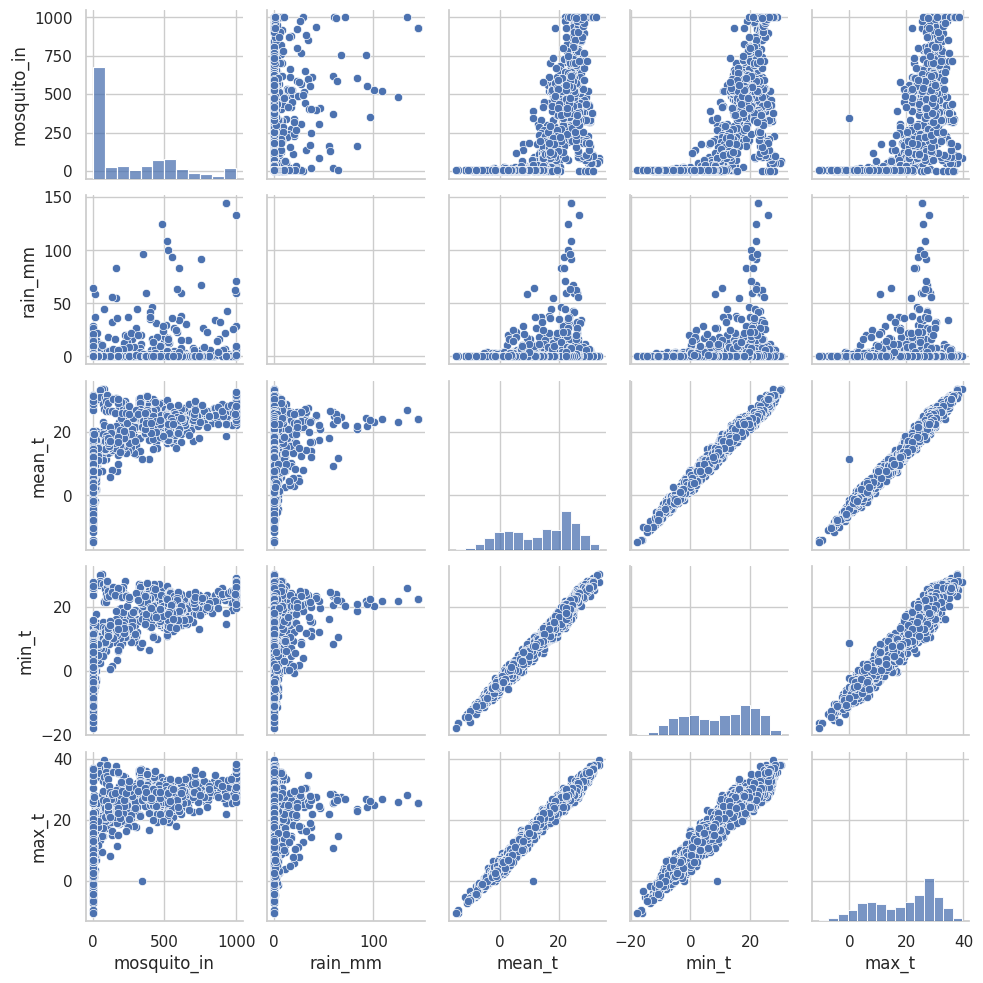

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style= 'whitegrid', context= 'notebook')
column = ['mosquito_in','rain_mm','mean_t','min_t','max_t']
sns.pairplot(df_clear[column],height=2)
plt.show()

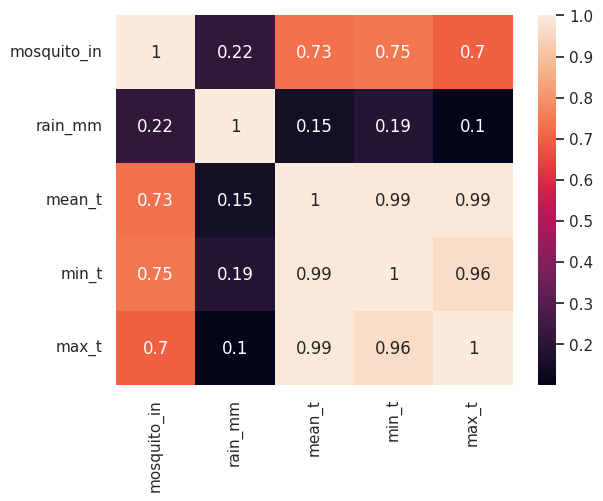

In [ ]:
cm  = np.corrcoef(df_clear[column].values.T)
sns.heatmap(cm, cbar = True, annot=True,yticklabels=column,xticklabels=column)
plt.show()

In [ ]:
#df_1 = df_1.drop(['max_t','min_t'],axis=1)
df_clear.head()

,mosquito_in,rain_mm,mean_t,min_t,max_t,year,month
0,254.4,0.0,18.8,12.2,26.0,2016,May
1,273.5,16.5,21.1,16.5,28.4,2016,May
2,304.0,27.0,12.9,8.9,17.6,2016,May
3,256.2,0.0,15.7,10.2,20.6,2016,May
4,243.8,7.5,18.9,10.2,26.9,2016,May


# Indicador de mosquitos a lo largo de los años

In [ ]:
df_clear.groupby('year').count()

,mosquito_in,rain_mm,mean_t,min_t,max_t,month
year,,,,,,
2016,242,242,242,242,242,242
2017,388,388,388,388,388,388
2018,351,351,351,351,351,351
2019,361,361,361,361,361,361


In [ ]:
palette= ['#f50400','#d6a735','#ff8862','#b93af8']

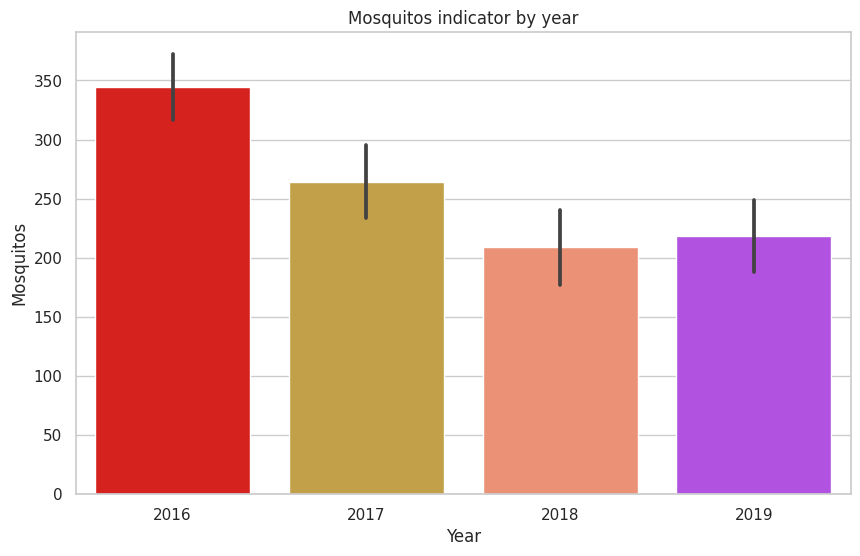

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_clear,x='year',y='mosquito_in',palette=palette)
plt.xlabel('Year')
plt.ylabel('Mosquitos')
plt.title("Mosquitos indicator by year")
plt.show()

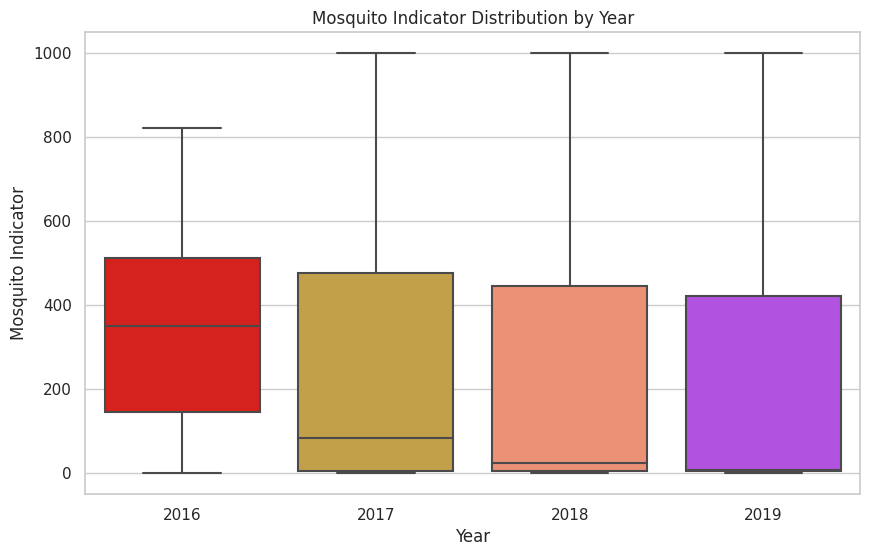

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clear, x='year', y='mosquito_in',palette=palette)
plt.xlabel('Year')
plt.ylabel('Mosquito Indicator')
plt.title('Mosquito Indicator Distribution by Year')
plt.show()

# Onehotencoder

In [ ]:
df_transformed = pd.get_dummies(df_clear, columns=['month','year'])
df_transformed.head()

,mosquito_in,rain_mm,mean_t,min_t,max_t,month_April,month_August,month_December,month_February,month_January,...,month_June,month_March,month_May,month_November,month_October,month_September,year_2016,year_2017,year_2018,year_2019
0,254.4,0.0,18.8,12.2,26.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,273.5,16.5,21.1,16.5,28.4,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,304.0,27.0,12.9,8.9,17.6,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,256.2,0.0,15.7,10.2,20.6,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,243.8,7.5,18.9,10.2,26.9,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Creando el modelo

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_cols = list(set(df_transformed.columns)-set(['mosquito_in']))
y_col = ['mosquito_in']

X = df_transformed[X_cols].values
y = df_transformed[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(336, 1)

R2 y MSE

In [ ]:
#estoy evaluando los valores reales que se encuentran en y_test y los valores predichos que estan en y_pred
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8288
mse:  0.174


In [ ]:
from regressors import stats

In [ ]:
model.intercept_ = model.intercept_
model.coef_ = model.coef_.reshape(-1)

In [ ]:
y_test = y_test.reshape(-1)
print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.7269 -0.1503 -0.0111 0.1591 1.2073


Coefficients:
                 Estimate               Std. Error         t value   p value
_intercept      -0.004577   0.02312800+0.00000000j -0.1979+0.0000j  0.843252
mean_t          -0.135492   0.41112800+0.00019900j -0.3296+0.0002j  0.741936
year_2017        0.034012  0.014664+324915.894205j  0.0000-0.0000j  1.000000
month_May        0.000845  0.025997+619407.984657j  0.0000-0.0000j  1.000000
year_2016       -0.002121  0.020132+233667.820353j -0.0000+0.0000j  1.000000
month_April     -0.175769  0.019940+462119.896816j -0.0000+0.0000j  1.000000
min_t            0.433466   0.18704500-0.00066000j  2.3174+0.0082j  0.021082
month_July       0.375010  0.045061+632831.120414j  0.0000-0.0000j  1.000000
year_2019        0.006319  0.014771+310861.591736j  0.0000-0.0000j  1.000000
rain_mm          0.030867   0.03035800-0.00020400j  1.0167+0.0068j  0.310023
month_December  -0.151

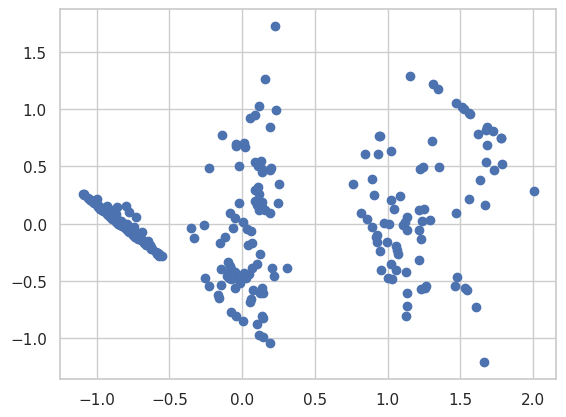

In [ ]:
import numpy as np
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

Creando segundo modelo

In [ ]:
X_cols = list(set(df_transformed.columns)-set(['mosquito_in','year_2016','year_2017', 'year_2018','year_2019']))
y_col = ['mosquito_in']

X = df_transformed[X_cols].values
y = df_transformed[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)


# MSE Y R2
Del segundo modelo

In [ ]:

r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print('R2:', r2.round(4))
print('MSE:', mse.round(4))

R2: 0.8217
MSE: 0.1658


In [ ]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [ ]:

print('========Summary==========')
stats.summary(model, X_test, y_test,X_cols)

========Summary==========
Residuals:
    Min      1Q  Median    3Q    Max
-1.2534 -0.0994  0.0258 0.218 1.4572


Coefficients:
                     Estimate               Std. Error                     t value   p value
_intercept       1.795700e-02   0.02234700+0.00000000j  8.035000e-01-0.000000e+00j  0.422229
month_April      3.361871e+12  106019.384513+0.000000j  3.170997e+07-0.000000e+00j  0.000000
min_t            4.707030e-01   0.19259600+0.00000000j  2.444000e+00-0.000000e+00j  0.015041
month_July       3.934121e+12  145183.890857+0.000000j  2.709750e+07-0.000000e+00j  0.000000
rain_mm          7.904000e-03   0.02391600-0.00000000j  3.305000e-01+0.000000e+00j  0.741237
month_December   3.989013e+12  149263.585531-0.000000j  2.672462e+07+0.000000e+00j  0.000000
month_August     3.906231e+12  143132.752495-0.000000j  2.729097e+07+0.000000e+00j  0.000000
mean_t          -6.738300e-02   0.41877200+0.00000000j -1.609000e-01+0.000000e+00j  0.872265
month_February   3.379147e+12  10711

In [ ]:
y__predict_inverse=sc_y.inverse_transform(y_pred)
M_predicion= pd.DataFrame(y__predict_inverse)
M_predicion.rename(columns={0: "Mosquito_prediccion"}, inplace=True)
lol= pd.DataFrame(sc_y.inverse_transform(y_test.reshape(-1, 1)))
lol.rename(columns={0: "Mosquito_indi"}, inplace=True)

data_compare_predict= pd.concat([lol, M_predicion], axis=1)

# Predicion vs los datos reales

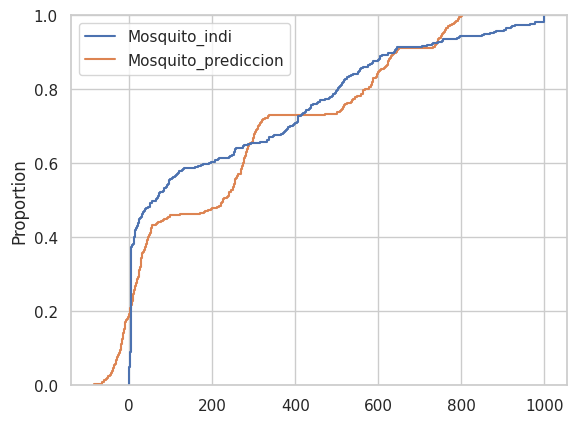

In [ ]:
sns.ecdfplot(
    data=data_compare_predict)
plt.show()